# FRTE Tests and characterisation

*** Note: Need to get attributions right for some of the expressions- they were reused by Matzen but not calibrated by them ***

Test the expressions and their predictions in pyMelt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyMelt as m
import pandas as pd

In [3]:
klb1 = m.load_phaseDiagram('thermocalc_klb1')
kg1 = m.load_phaseDiagram('thermocalc_kg1')

In [4]:
lz = m.lithologies.matthews.klb1()
mantle = m.mantle([lz], [1.0], ['lz'], )

# Tps = [1300.0, 1400.0, 1500.0]
Tps = [1400.0]
cols = []

for Tp in Tps:
    cols.append(mantle.adiabaticMelt(Tp))

for col in cols:
    col.calculateChemistry(elements= {'lz': {'Ni': 0.186 * 1e4,
                                      'Mn': 1050.0,
                                      'FeO': None}},
                           method= {'Ni': 'phase_diagram_trace',
                                    'Mn': 'phase_diagram_trace',
                                    'FeO': 'phase_diagram_major'},
                           olv_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           cpx_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           opx_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           grt_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           spn_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           plg_D = 1e-5,
                           phaseDiagram = klb1
                           )

## KLB1 Partition Coefficients

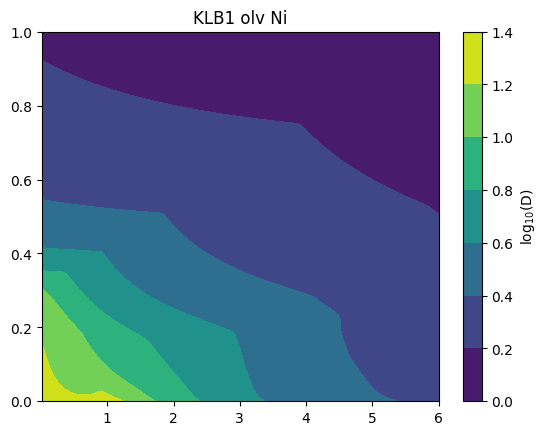

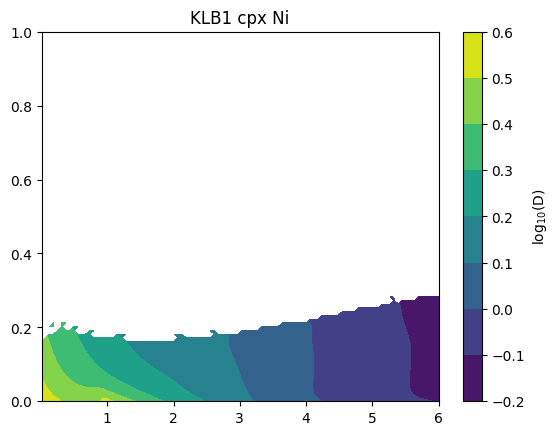

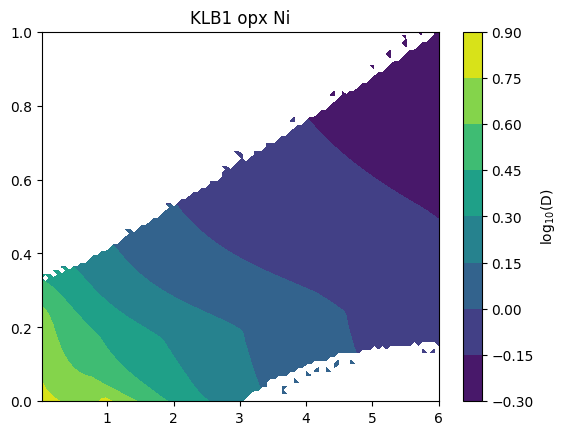

/Users/sm905/repos/pyMelt/pyMelt/chemistry/matzen.py:160: RuntimeWarning: divide by zero encountered in log
  return _np.exp(_np.log(DMg) + _np.log(olv_kd) - _np.log(mineral_kd))
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_55390/784884824.py:23: RuntimeWarning: divide by zero encountered in log10
  cf = a.contourf(pp, xx, np.log10(D))


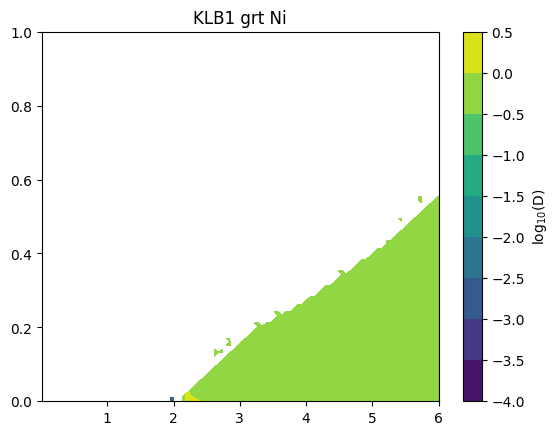

/Users/sm905/repos/pyMelt/pyMelt/chemistry/matzen.py:471: RuntimeWarning: invalid value encountered in scalar divide
  Crn = spn_Cr2O3 / 151.9904 / (spn_Cr2O3 / 151.9904 + spn_Al2O3 / 101.961276 + spn_Fe2O3 / 159.69)


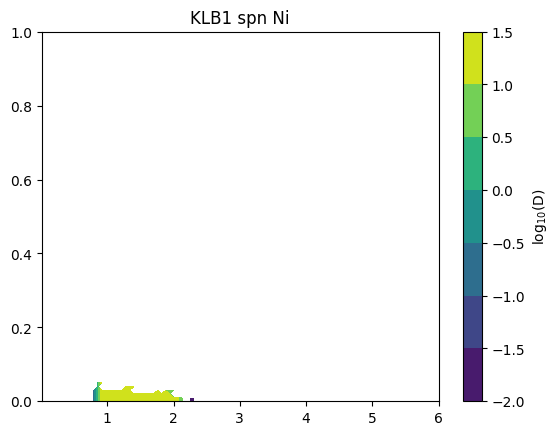

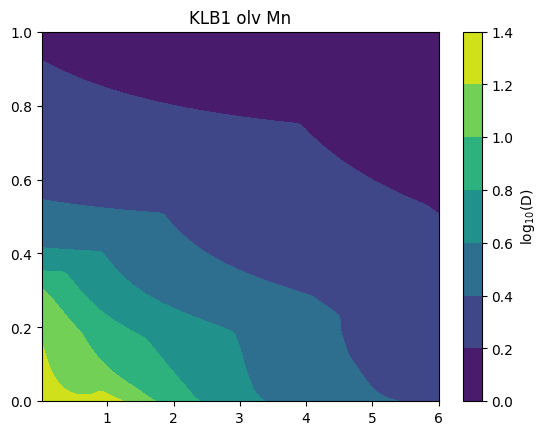

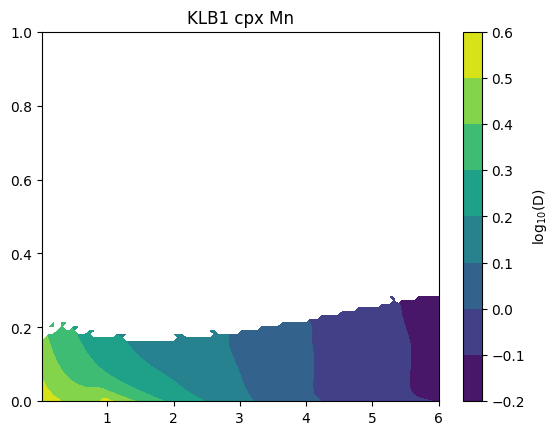

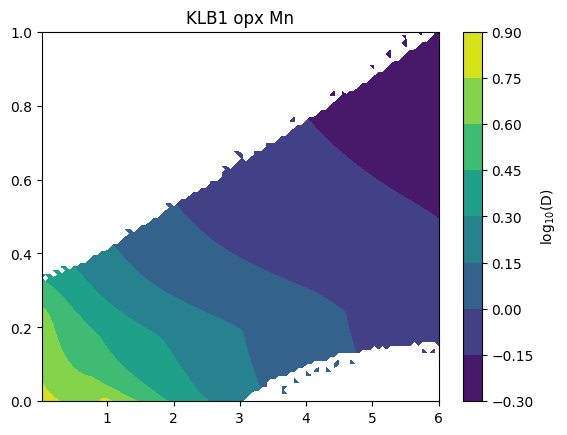

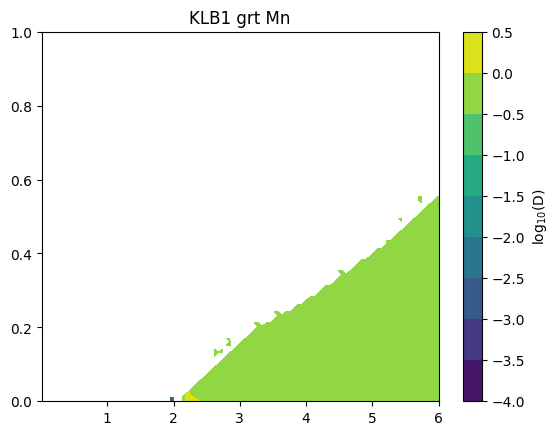

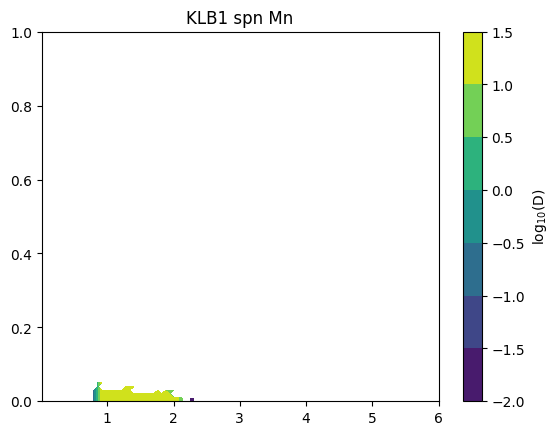

In [3]:
for el in ['Ni', 'Mn']:
    for ph in ['olv', 'cpx', 'opx', 'grt', 'spn']:

        p = np.linspace(0.01, 6, 100)
        x = np.linspace(0, 1, 100)

        pp, xx = np.meshgrid(p, x)

        D = np.zeros(np.shape(pp))

        for i in range(np.shape(pp)[0]):
            for j in range(np.shape(pp)[1]):
                state = pd.Series({'P': pp[i,j], 
                                'T':klb1('temperature', pd.Series({'P':pp[i,j], 'F':xx[i,j]})), 
                                'F': xx[i,j]})
                if klb1(ph + '_mass', state) > 1e-6:
                    D[i,j] = m.chemistry.matzen.D(state, ph, 'Ni', phaseDiagram=klb1)
                else:
                    D[i,j] = np.nan
        
        f, a = plt.subplots()

        cf = a.contourf(pp, xx, np.log10(D))
        cbar = plt.colorbar(cf)
        cbar.set_label('log$_{10}$(D)')
        a.set_title('KLB1 ' + ph + ' ' + el)
        plt.show()


## KG1 Partition Coefficients

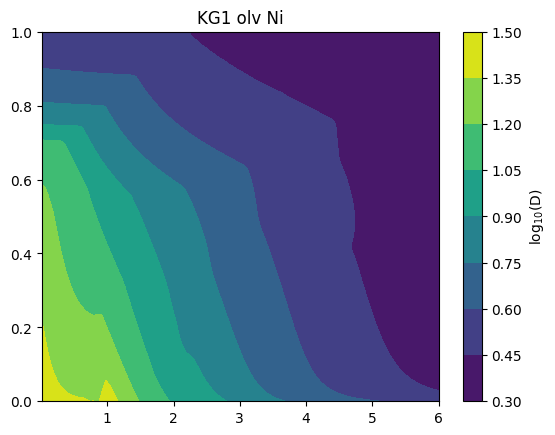

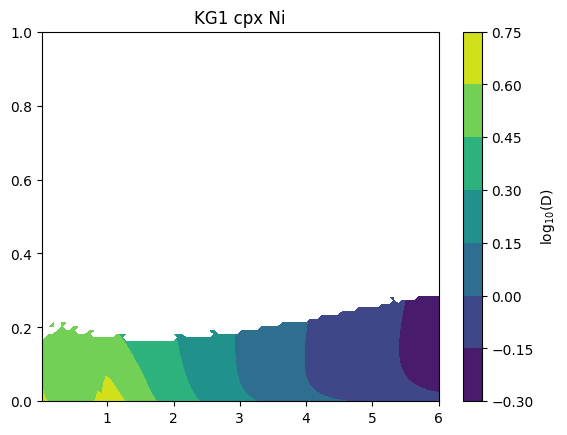

/Users/sm905/repos/pyMelt/pyMelt/chemistry/matzen.py:160: RuntimeWarning: divide by zero encountered in log
  return _np.exp(_np.log(DMg) + _np.log(olv_kd) - _np.log(mineral_kd))
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_8971/3238771560.py:23: RuntimeWarning: divide by zero encountered in log10
  cf = a.contourf(pp, xx, np.log10(D))


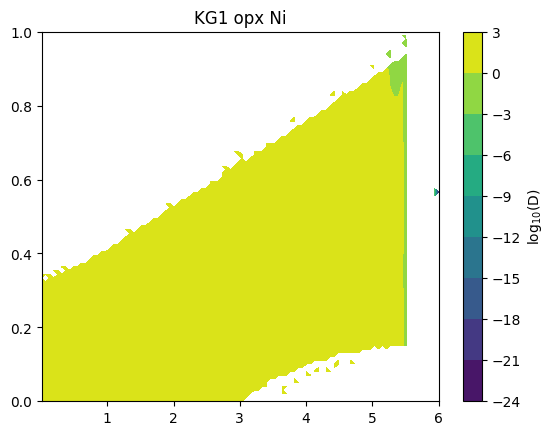

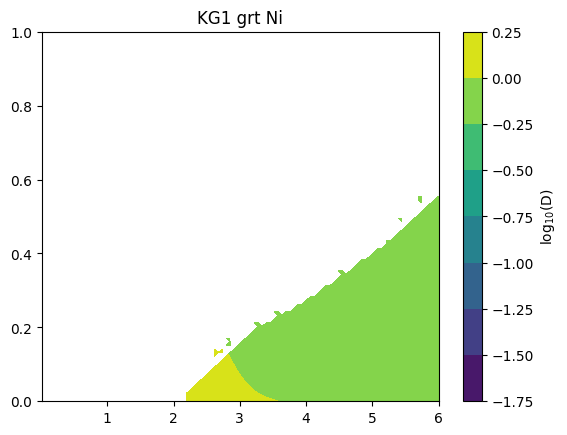

/Users/sm905/repos/pyMelt/pyMelt/chemistry/matzen.py:471: RuntimeWarning: invalid value encountered in scalar divide
  Crn = spn_Cr2O3 / 151.9904 / (spn_Cr2O3 / 151.9904 + spn_Al2O3 / 101.961276 + spn_Fe2O3 / 159.69)


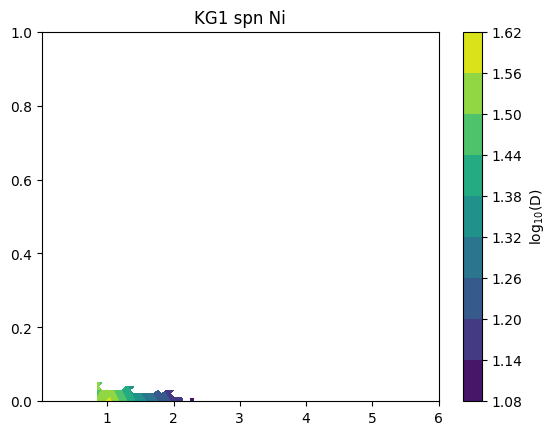

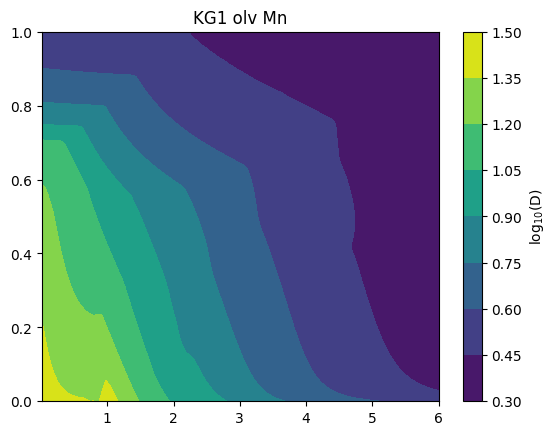

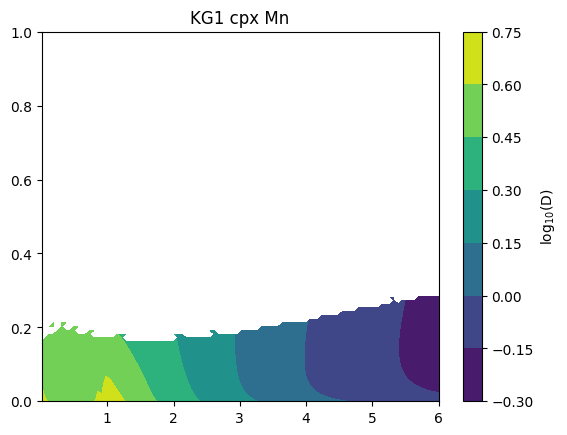

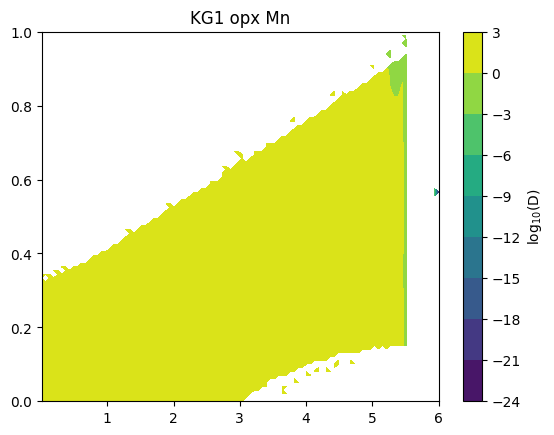

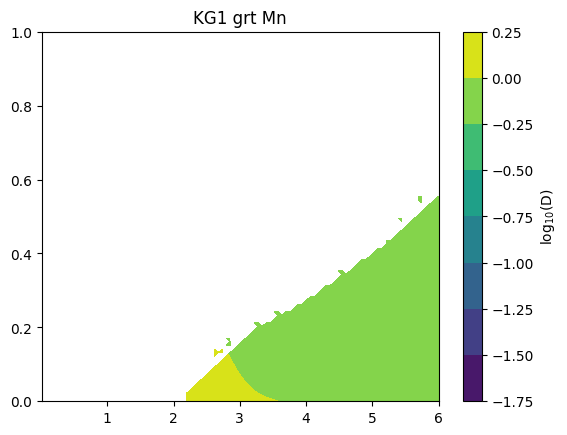

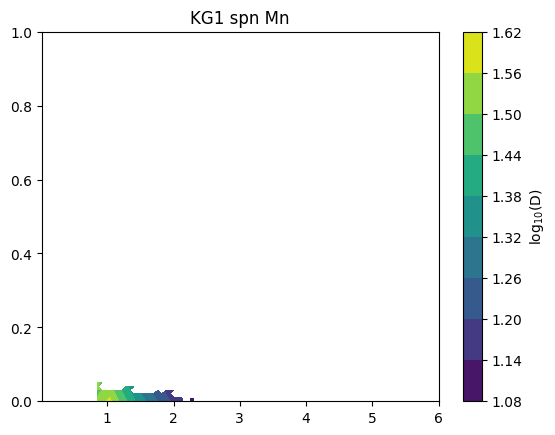

In [39]:
for el in ['Ni', 'Mn']:
    for ph in ['olv', 'cpx', 'opx', 'grt', 'spn']:

        p = np.linspace(0.01, 6, 100)
        x = np.linspace(0, 1, 100)

        pp, xx = np.meshgrid(p, x)

        D = np.zeros(np.shape(pp))

        for i in range(np.shape(pp)[0]):
            for j in range(np.shape(pp)[1]):
                state = pd.Series({'P': pp[i,j], 
                                'T':kg1('temperature', pd.Series({'P':pp[i,j], 'F':xx[i,j]})), 
                                'F': xx[i,j]})
                if klb1(ph + '_mass', state) > 1e-6:
                    D[i,j] = m.chemistry.matzen.D(state, ph, 'Ni', phaseDiagram=kg1)
                else:
                    D[i,j] = np.nan
        
        f, a = plt.subplots()

        cf = a.contourf(pp, xx, np.log10(D))
        cbar = plt.colorbar(cf)
        cbar.set_label('log$_{10}$(D)')
        a.set_title('KG1 ' + ph + ' ' + el)
        plt.show()


## Pure Lherzolite Melting Models

In [8]:
p = np.linspace(0.01, 6, 100)
x = np.linspace(0, 1, 100)

pp, xx = np.meshgrid(p, x)

D = np.zeros(np.shape(pp))

phases = ['olv', 'cpx', 'opx', 'grt', 'spn']

for i in range(np.shape(pp)[0]):
    for j in range(np.shape(pp)[1]):
        for ph in phases:
            state = pd.Series({'P': pp[i,j], 
                               'T':klb1('temperature', pd.Series({'P':pp[i,j], 'F':xx[i,j]})), 
                               'F': xx[i,j]})
            if klb1(ph+'_mass', state) > 1e-3:
                D[i,j] += m.chemistry.matzen.D(state, ph, 'Ni', phaseDiagram=klb1) * klb1(ph+'_mass', state) / (1-xx[i,j])


/var/folders/n0/svdqwyps7dn84jf04d055ywh0000gn/T/ipykernel_26826/1595560083.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  D[i,j] += m.chemistry.matzen.D(state, ph, 'Ni', phaseDiagram=klb1) * klb1(ph+'_mass', state) / (1-xx[i,j])


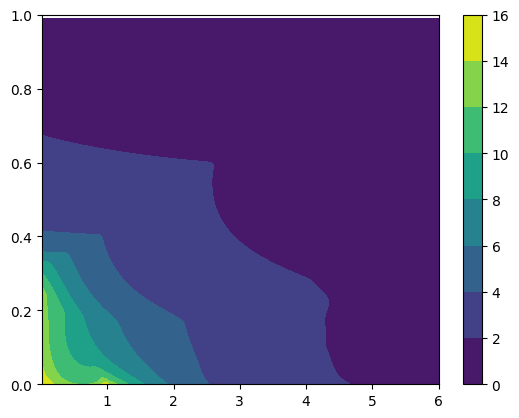

In [30]:
f, a = plt.subplots()

cf = a.contourf(pp, xx, D)

f.colorbar(cf)

plt.show()

In [23]:
lz = m.lithologies.matthews.klb1()
mantle = m.mantle([lz], [1.0], ['lz'], )

Tps = [1300.0, 1400.0, 1500.0]
# Tps = [1400.0]
cols = []

for Tp in Tps:
    cols.append(mantle.adiabaticMelt(Tp))

for col in cols:
    col.calculateChemistry(elements= {'lz': {'Ni': 1960,
                                      'Mn': 1050.0,
                                      'FeO': None}},
                           method= {'Ni': 'phase_diagram_trace',
                                    'Mn': 'phase_diagram_trace',
                                    'FeO': 'phase_diagram_major'},
                           olv_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           cpx_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           opx_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           grt_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           spn_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           plg_D = 1e-5,
                           phaseDiagram = klb1
                           )

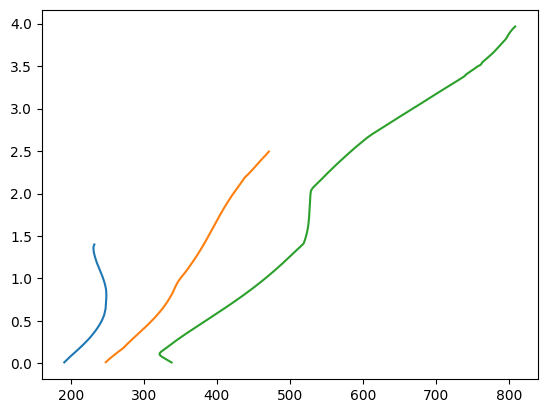

In [9]:
f, a = plt.subplots()

a.plot(cols[0].lithologies['lz'].Ni, cols[0].P)
a.plot(cols[1].lithologies['lz'].Ni, cols[1].P)
a.plot(cols[2].lithologies['lz'].Ni, cols[2].P)

plt.show()

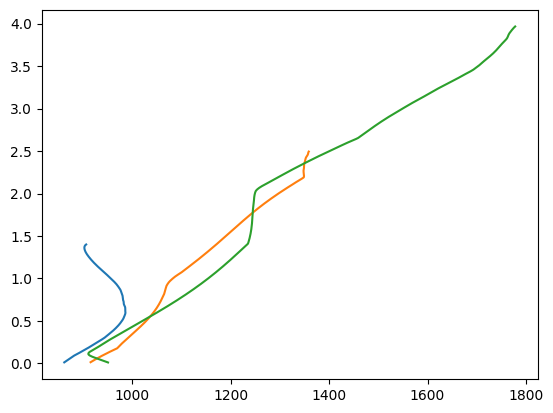

In [10]:
f, a = plt.subplots()

a.plot(cols[0].lithologies['lz'].Mn, cols[0].P)
a.plot(cols[1].lithologies['lz'].Mn, cols[1].P)
a.plot(cols[2].lithologies['lz'].Mn, cols[2].P)

plt.show()

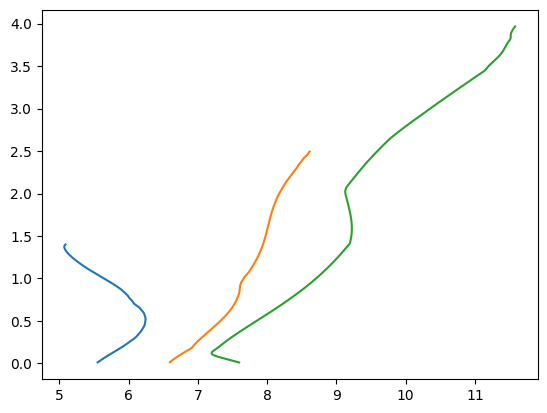

In [7]:
f, a = plt.subplots()

a.plot(cols[0].lithologies['lz'].FeO, cols[0].P)
a.plot(cols[1].lithologies['lz'].FeO, cols[1].P)
a.plot(cols[2].lithologies['lz'].FeO, cols[2].P)

plt.show()

## Pyroxenite + Lherzolite Melting Model

In [11]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()
mantle = m.mantle([lz, px], [0.8, 0.2], ['lz', 'px'], )

Tps = [1300.0, 1400.0, 1500.0]
# Tps = [1400.0]
cols = []

for Tp in Tps:
    cols.append(mantle.adiabaticMelt(Tp))

for col in cols:
    col.calculateChemistry(elements= {'lz': {'Ni': 1960,
                                             'Mn': 1050.0,
                                             'FeO': None},
                                      'px': {'Ni': 92.0,
                                             'Mn': 1400.0,
                                             'FeO': None}},
                           method= {'Ni': 'phase_diagram_trace',
                                    'Mn': 'phase_diagram_trace',
                                    'FeO': 'phase_diagram_major'},
                           olv_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           cpx_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           opx_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           grt_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           spn_D = {'Ni': m.chemistry.matzen.D,
                                    'Mn': m.chemistry.matzen.D,
                                    'FeO': None},
                           plg_D = 1e-5,
                           phaseDiagram = {'lz': klb1, 'px': kg1}
                           )

/Users/sm905/repos/pyMelt/pyMelt/mantle_class.py:476: UserWarning: Freezing prevented.
  _warn("Freezing prevented.")


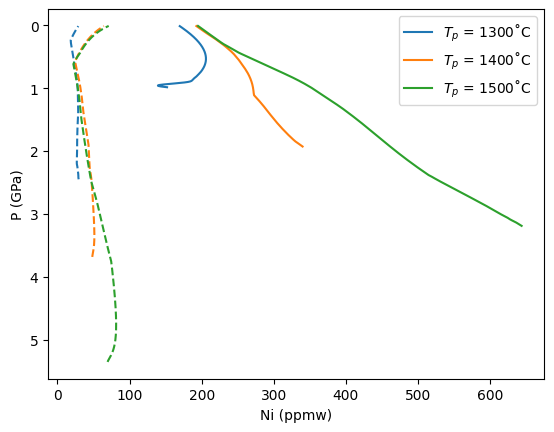

In [36]:
f, a = plt.subplots()

a.plot(cols[0].lithologies['lz'].Ni, cols[0].P, c='C0', label = '$T_p$ = 1300˚C')
a.plot(cols[0].lithologies['px'].Ni, cols[0].P, c='C0', ls='--')
a.plot(cols[1].lithologies['lz'].Ni, cols[1].P, c='C1', label = '$T_p$ = 1400˚C')
a.plot(cols[1].lithologies['px'].Ni, cols[1].P, c='C1', ls='--')
a.plot(cols[2].lithologies['lz'].Ni, cols[2].P, c='C2', label = '$T_p$ = 1500˚C')
a.plot(cols[2].lithologies['px'].Ni, cols[2].P, c='C2', ls='--')

a.invert_yaxis()
a.legend()

a.set_ylabel('P (GPa)')
a.set_xlabel('Ni (ppmw)')

plt.show()

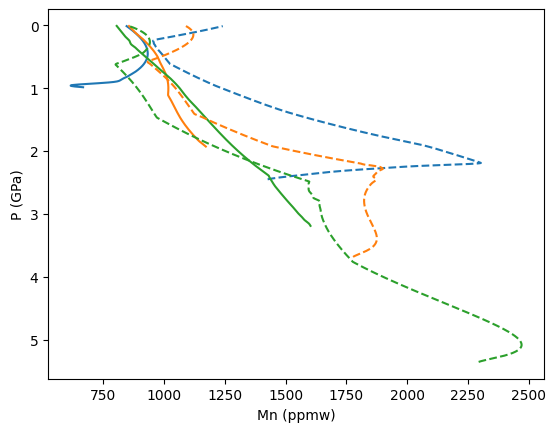

In [34]:
f, a = plt.subplots()

a.plot(cols[0].lithologies['lz'].Mn, cols[0].P, c='C0')
a.plot(cols[0].lithologies['px'].Mn, cols[0].P, c='C0', ls='--')
a.plot(cols[1].lithologies['lz'].Mn, cols[1].P, c='C1')
a.plot(cols[2].lithologies['lz'].Mn, cols[2].P, c='C2')
a.plot(cols[1].lithologies['px'].Mn, cols[1].P, c='C1', ls='--')
a.plot(cols[2].lithologies['px'].Mn, cols[2].P, c='C2', ls='--')

a.invert_yaxis()

a.set_ylabel('P (GPa)')
a.set_xlabel('Mn (ppmw)')

plt.show()

In [21]:
Pliths = [3, 2, 1, 0.5]

geosettings1300 = []
geosettings1400 = []
geosettings1500 = []

for Plith in Pliths:
    geosettings1300.append(m.geosettings.spreadingCentre(cols[0], P_lithosphere=Plith))
    geosettings1400.append(m.geosettings.spreadingCentre(cols[1], P_lithosphere=Plith))
    geosettings1500.append(m.geosettings.spreadingCentre(cols[2], P_lithosphere=Plith))

/Users/sm905/repos/pyMelt/pyMelt/geosettings.py:446: RuntimeWarning: invalid value encountered in divide
  c = c / _trapz((1 + weights) * f / (1 - f),)


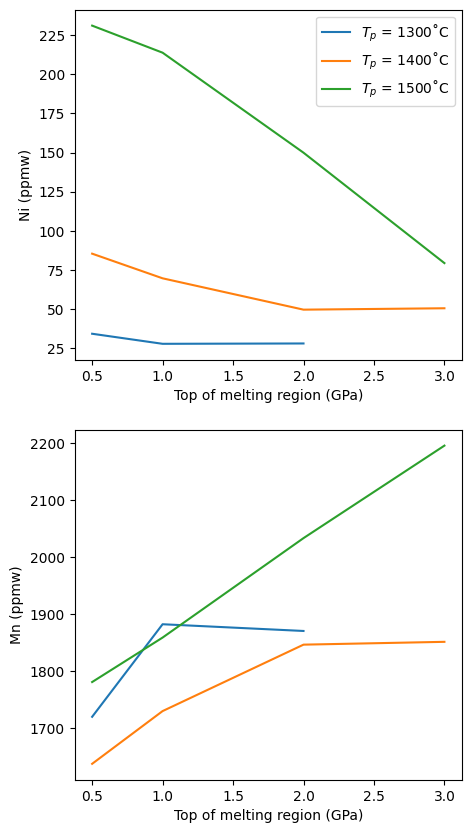

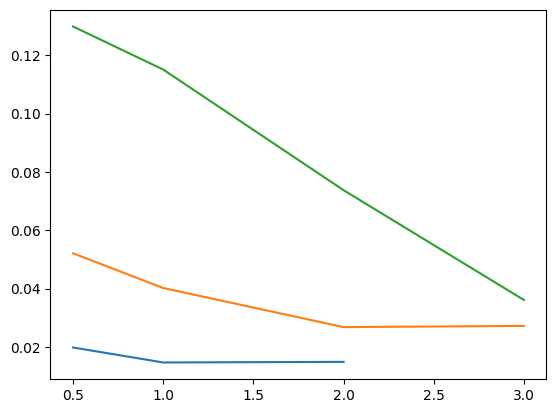

In [31]:
f, a = plt.subplots(2,1, figsize=(5,10))
g, b = plt.subplots()

Ni = []
Mn = []
for geoset in geosettings1300:
    Ni.append(geoset.chemistry['Ni'])
    Mn.append(geoset.chemistry['Mn'])
a[0].plot(Pliths, Ni, label='$T_p$ = 1300˚C')
a[1].plot(Pliths, Mn)
b.plot(Pliths, np.array(Ni)/np.array(Mn), label='$T_p$ = 1300˚C')

Ni = []
Mn = []
for geoset in geosettings1400:
    Ni.append(geoset.chemistry['Ni'])
    Mn.append(geoset.chemistry['Mn'])
a[0].plot(Pliths, Ni, label='$T_p$ = 1400˚C')
a[1].plot(Pliths, Mn)
b.plot(Pliths, np.array(Ni)/np.array(Mn), label='$T_p$ = 1400˚C')

Ni = []
Mn = []
for geoset in geosettings1500:
    Ni.append(geoset.chemistry['Ni'])
    Mn.append(geoset.chemistry['Mn'])
a[0].plot(Pliths, Ni, label='$T_p$ = 1500˚C')
a[1].plot(Pliths, Mn)
b.plot(Pliths, np.array(Ni)/np.array(Mn), label='$T_p$ = 1500˚C')

a[0].set_xlabel('Top of melting region (GPa)')
a[0].set_ylabel('Ni (ppmw)')

a[1].set_xlabel('Top of melting region (GPa)')
a[1].set_ylabel('Mn (ppmw)')

a[0].legend()

plt.show()

In [18]:
t = geosettings1300[0]
t.chemistry

Ni       50.408031
Mn     1549.679482
FeO       7.252001
dtype: float64